<a href="https://colab.research.google.com/github/AdiDev1411/Machine-learning/blob/main/Decision_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris


In [20]:
iris = load_iris()

In [21]:
df = pd.DataFrame(iris.data)

In [22]:
df.columns = iris.feature_names
df['specices']  = iris.target

In [46]:
df

,sepal length (cm),petal length (cm),specices
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [47]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split


In [48]:
x_train , x_test , y_train , y_test = train_test_split(X  ,y , test_size=0.2 , random_state= 42)
x_train.shape

(120, 2)

In [49]:
from sklearn.tree import DecisionTreeClassifier


In [89]:
clf = DecisionTreeClassifier(max_depth=5)

In [91]:
clf.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=5)

In [92]:
y_pred = clf.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score

In [95]:
from sklearn.metrics import r2_score

In [96]:
print("Accuracy score :" , r2_score(y_test , y_pred))

Accuracy score : 1.0


In [75]:
from mlxtend.plotting import plot_decision_regions

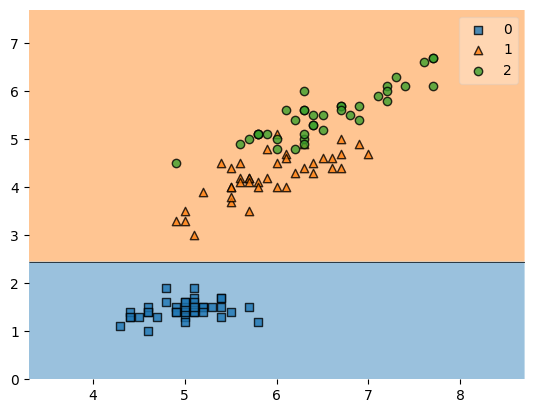

In [76]:
p = plot_decision_regions(x_train.values , y_train.values , clf )

# **Hyperparamiter** **Tunning**

In [82]:
param_grid = {
    'criterion' :['gini', 'entropy', 'log_loss'],
    'max_depth' : [1,5,10,20,None]

}

In [78]:
from sklearn.model_selection import GridSearchCV

In [84]:
clf2 = GridSearchCV(estimator=clf , param_grid=param_grid , scoring='r2' , cv=5)

In [85]:
clf2.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, 20, None]},
             scoring='r2')

In [86]:
clf2.best_score_

np.float64(0.9125)